In [63]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
data = pd.read_csv('../Data/02_Clean.csv')

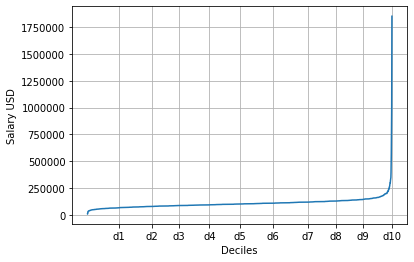

In [164]:
labels = ["d1", "d2","d3", "d4","d5", "d6","d7", "d8","d9", "d10"]
salaryMean = data.SalaryUSD.mean()
salarySort = data.SalaryUSD.sort_values()
salarySort = salarySort.values
salaryDecile = pd.qcut(salarySort, 10, labels=labels)
deciles = salaryDecile.value_counts()

newDeciles = []
save = 0
for x in deciles :
    save += x
    newDeciles.append(save)

salaryPlot = sns.lineplot(data=salarySort)
salaryPlot.set_xticks(newDeciles)
salaryPlot.set_xticklabels(labels)
salaryPlot.set_ylabel("Salary USD")
salaryPlot.set_xlabel("Deciles")
salaryPlot.ticklabel_format(style='plain', axis="y")
salaryPlot.grid()